In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import copy
from astropy.io import fits
import lightkurve as lk
import random

from EightBitTransit.cTransitingImage import TransitingImage
from EightBitTransit.inversion import *
from EightBitTransit.misc import *

import scipy.interpolate as interp
import scipy

%matplotlib inline

0.0006149042851666919


<Figure size 432x288 with 0 Axes>

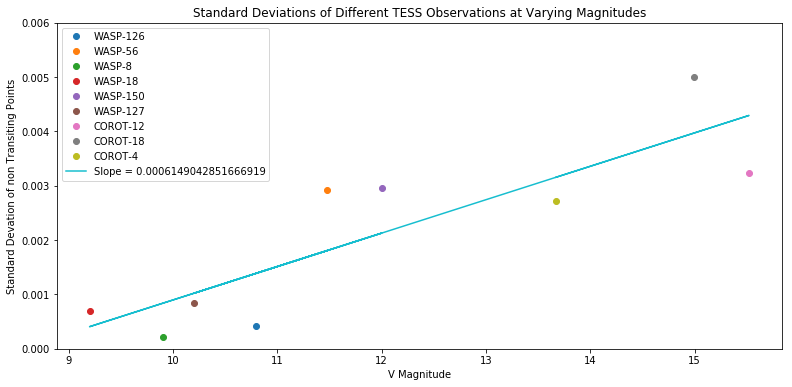

In [3]:
# characterize noise as standard dev in a plot
h0 = fits.open('reference_planet_WASP126.fits') #10.8 mag
time0 = h0[1].data['TIME'][:800]
LC0 = h0[1].data['FLUX'][:800]
st0 = np.std(LC0)
mag0 = 10.8
name0 = "WASP-126"

h1 = fits.open('reference_planet_WASP-56_11.48.fits')
time1 = h1[1].data['TIME'][:800]
LC1 = h1[1].data['FLUX'][:800]
st1 = np.std(LC1)
mag1 = 11.48
name1 = "WASP-56"

h2 = fits.open('reference_planet_WASP-8_9.9.fits')
time2 = h2[1].data['TIME'][:300]
LC2 = h2[1].data['FLUX'][:300]
st2 = np.std(LC2)
mag2 = 9.9
name2 = "WASP-8"

h3 = fits.open('reference_planet_WASP-18_9.2.fits')
time3 = h3[1].data['TIME'][:800]
LC3 = h3[1].data['FLUX'][:800]
st3 = np.std(LC3)
mag3 = 9.2
name3 = "WASP-18"

h4 = fits.open('reference_planet_WASP-150_12.0.fits')
time4 = h4[1].data['TIME'][:800]
LC4 = h4[1].data['FLUX'][:800]
st4 = np.std(LC4)
mag4 = 12.0
name4 = "WASP-150"

h5 = fits.open('reference_planet_WASP-127_10.2.fits')
time5 = h5[1].data['TIME'][1050:1300]
LC5 = h5[1].data['FLUX'][1050:1300]
st5 = np.std(LC5)
mag5 = 10.2
name5 = "WASP-127"

h6 = fits.open('reference_planet_COROT-12_15.52.fits')
time6 = h6[1].data['TIME'][:1300]
LC6 = h6[1].data['FLUX'][:1300]
st6 = np.std(LC6)
mag6 = 15.52
name6 = "COROT-12"

h7 = fits.open('reference_planet_COROT-18_14.99.fits')
time7 = h7[1].data['TIME'][:1300]
LC7 = h7[1].data['FLUX'][:1300]
st7 = np.std(LC7)
mag7 = 14.99
name7 = "COROT-18"

h8 = fits.open('reference_planet_COROT-4_13.67.fits')
time8 = h8[1].data['TIME'][:1300]
LC8 = h8[1].data['FLUX'][:1300]
st8 = np.std(LC8)
mag8 = 13.67
name8 = "COROT-4"

mags = np.array([mag0, mag1, mag2, mag3, mag4, mag5, mag6, mag7, mag8])
stds = [st0, st1, st2, st3, st4, st5, st6, st7, st8]
m, b = np.polyfit(mags, stds, 1)
print(m)

plt.clf()
plt.figure(figsize=(13,6))
plt.ylim(0, 0.006)
plt.title("Standard Deviations of Different TESS Observations at Varying Magnitudes")
plt.xlabel("V Magnitude")
plt.ylabel("Standard Devation of non Transiting Points")
plt.plot(mag0, st0, 'o',label=name0)
plt.plot(mag1, st1, 'o',label=name1)
plt.plot(mag2, st2, 'o',label=name2)
plt.plot(mag3, st3, 'o',label=name3)
plt.plot(mag4, st4, 'o',label=name4)
plt.plot(mag5, st5, 'o',label=name5)
plt.plot(mag6, st6, 'o',label=name6)
plt.plot(mag7, st7, 'o',label=name7)
plt.plot(mag8, st8, 'o',label=name8)
plt.plot(mags, m*mags + b, '-', label="Slope = "+str(m))
plt.legend()
plt.show()


In [4]:
# now take a random magnitude between 8.5 and 15.5 and find its standard deviation

In [5]:
mag_rand = random.uniform(8.5, 15.5)
sub_rand = random.uniform(0, 0.0001)
stdev = ( mag_rand * m + b ) - sub_rand


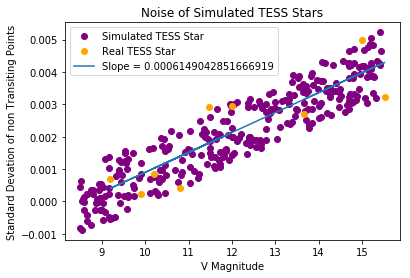

In [6]:
p = 0
while p < 300:
    mag_rand = random.uniform(8.5, 15.5)
    sub_rand = random.uniform(-0.001, 0.001)
    stdev = ( mag_rand * m + b ) - sub_rand
    plt.plot(mag_rand, stdev, 'o', color="purple")
    p = p + 1

plt.plot(mag_rand, stdev, 'o', color="purple", label="Simulated TESS Star")

plt.plot(mag0, st0, 'o', color = "orange")
plt.plot(mag1, st1, 'o',color = "orange")
plt.plot(mag2, st2, 'o',color = "orange")
plt.plot(mag3, st3, 'o',color = "orange")
plt.plot(mag4, st4, 'o',color = "orange")
plt.plot(mag5, st5, 'o',color = "orange")
plt.plot(mag6, st6, 'o',color = "orange")
plt.plot(mag7, st7, 'o',color = "orange")
plt.plot(mag8, st8, 'o',color = "orange", label="Real TESS Star")
plt.plot(mags, m*mags + b, '-', label="Slope = "+str(m))
plt.legend()

plt.title("Noise of Simulated TESS Stars")
plt.xlabel("V Magnitude")
plt.ylabel("Standard Devation of non Transiting Points")
plt.show()

In [7]:
# creating noise for one source -> generate a random number of points (between 800 and 1200)
num_points = random.uniform(800, 1200)
noise = np.array([])
j = 0
while j < num_points:
    noise = np.append(noise, [random.uniform(-(stdev/2), (stdev/2))])
    j = j + 1

/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


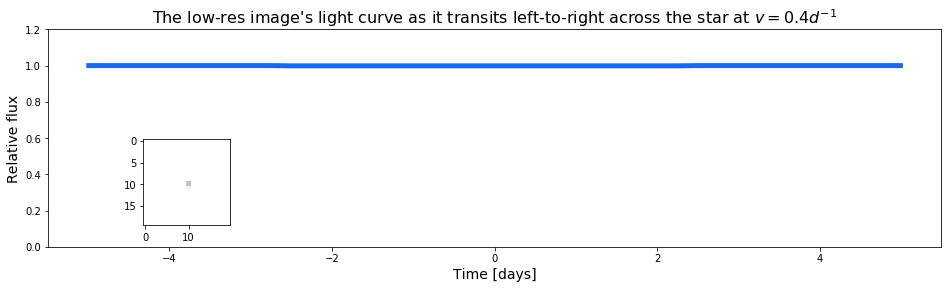

In [8]:
planet_times = np.linspace(-35.,35.,num_points)
planet_lowres_SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/code/ref_planet.png",
                                    lowres=20,
                                    lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                    lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                    v=0.4,
                                    t_ref=0.,
                                    t_arr=planet_times)
#lowres_SItitle.plot_grid()
#print np.shape(lowres_SItitle.opacitymat)
    
planet_lowres_SItitle_LC, overlapTimes = planet_lowres_SItitle.gen_LC(t_arr=planet_times) 
    
fig, ax = plt.subplots(1,1,figsize=(16,4))
ax = plt.axes()
ax.plot(overlapTimes,planet_lowres_SItitle_LC,color="#1969ea",ls="-",lw=5)
ax.set_ylim(0.0,1.2)
plt.xlabel("Time [days]",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"The low-res image's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
ax1 = plt.axes([.095, .2, 0.3, 0.3])
ax1.imshow(planet_lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
#filename = "/Users/piperfrances/BSRC/code/results_subtract_artifacts/1"
#plt.savefig(filename, fmt="png")
plt.show()
plt.close()

In [9]:
planet_times.shape

(885,)

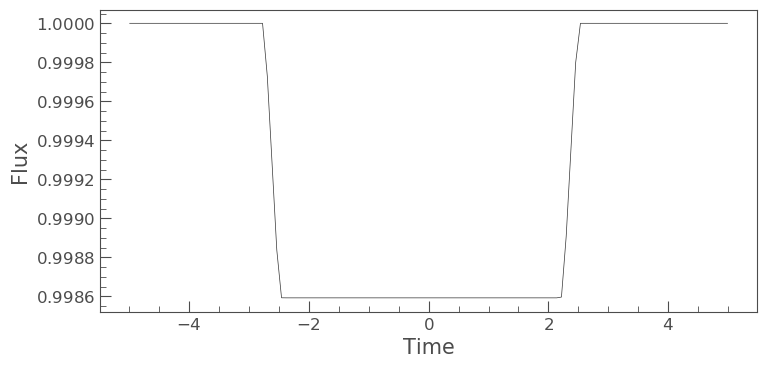

In [10]:
# making noisy

# first, make a lightkurve object
artif_LC = lk.LightCurve(time = overlapTimes, flux = planet_lowres_SItitle_LC)
artif_LC.plot()

In [11]:
# interpolating the smaller arrays
planet_interp_LC = interp.interp1d(np.arange(planet_lowres_SItitle_LC.size),planet_lowres_SItitle_LC)
planet_LC_stretch = planet_interp_LC(np.linspace(0,planet_lowres_SItitle_LC.size-1,noise.size))

time_interp = interp.interp1d(np.arange(overlapTimes.size),overlapTimes)
time = time_interp(np.linspace(0,overlapTimes.size-1,noise.size))

In [12]:
# making noisy! 
planet_noisy_LC = planet_LC_stretch * (noise + 1)

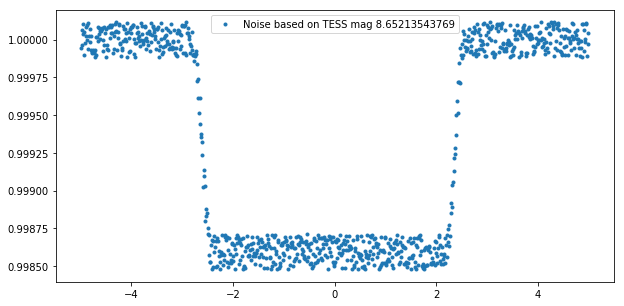

In [13]:
plt.figure(figsize=(10,5))
plt.plot(time, planet_noisy_LC, '.', label="Noise based on TESS mag " + str(mag_rand))
plt.legend()

In [14]:
# NOW, let's loop it!

ind = 0

LCs = {}
Ts = {}
mags = []

while ind < 11:
    
    mag_rand = random.uniform(8.5, 15.5)
    sub_rand = random.uniform(-0.001, 0.001)
    stdev = ( mag_rand * m + b ) - sub_rand
    num_points = random.uniform(800, 1200)
    
    noise = np.array([])
    j = 0
    while j < num_points:
        noise = np.append(noise, [random.uniform(-(stdev/2), (stdev/2))])
        j = j + 1
        
    planet_interp_LC = interp.interp1d(np.arange(planet_lowres_SItitle_LC.size),planet_lowres_SItitle_LC)
    planet_LC_stretch = planet_interp_LC(np.linspace(0,planet_lowres_SItitle_LC.size-1,noise.size))

    time_interp = interp.interp1d(np.arange(overlapTimes.size),overlapTimes)
    time = time_interp(np.linspace(0,overlapTimes.size-1,noise.size))
    
    planet_noisy_LC = planet_LC_stretch * (noise + 1)
    
    LCs[ind] = planet_noisy_LC
    Ts[ind] = time
    
    mags = np.append(mags, mag_rand)
    
    ind = ind + 1

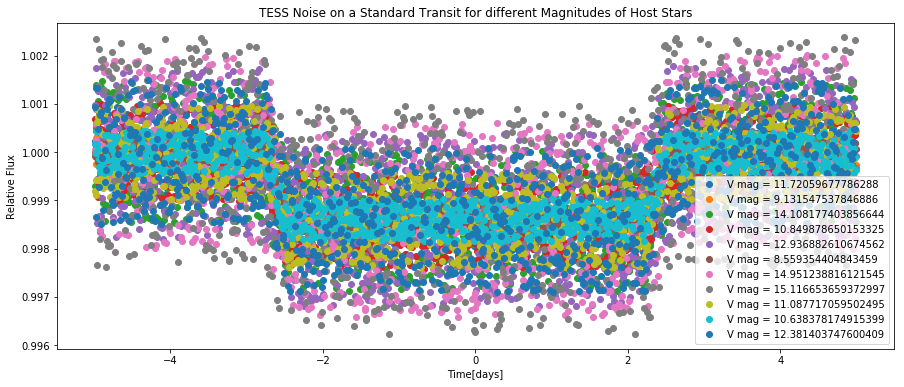

In [15]:
plt.figure(figsize=(15,6))
plt.title("TESS Noise on a Standard Transit for different Magnitudes of Host Stars")
plt.ylabel("Relative Flux")
plt.xlabel("Time[days]")
while ind > 0:
    ind = ind - 1
    plt.plot(Ts[ind], LCs[ind], 'o', label="V mag = " + str(mags[ind]))
plt.legend()
plt.show()

In [16]:
# now non-planetary objects!
# Now more artifacts!

i = 0
# names has 15 items
# artifacts has 10
# /simple-shapes/simple-shapes-set/ has 2,060 -> #0 is a planet
while i < 3000:
    try:
        times = np.linspace(-35.,35.,num_points)

            # create a TransitingImage object, which reads in an image file and converts it into a matrix of pixels
            # transiting the star at velocity v [days**-1], with reference time t_ref [days]
        #     SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/EightBitTransit/names/"+str(i)+".png",
        #                               v=0.4,
        #                               t_ref=0.,
        #                               t_arr=times)
            #SItitle.plot_grid()
            #print np.shape(SItitle.opacitymat) # the pixelated image grid. Notice that this is very high-resolution, so the 
                                               # light curve calculation in the next cell would be slow.

            # We can speed up the light curve calculation by specifying a lower image resolution, e.g. 20 pixels in height.
            # The image aspect ratio will not change.
            # "/Users/piperfrances/BSRC/code/simple-shapes/simple-shapes-set/shape"+str(i)+".png"
        lowres_SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/code/simple-shapes/smaller-shapes-set/shape"+str(i)+".png",
                                             lowres=80,
                                             lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                             lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                             v=0.4,
                                             t_ref=0.,
                                             t_arr=times)
            #lowres_SItitle.plot_grid()
            #print np.shape(lowres_SItitle.opacitymat)

        artificial_lowres_SItitle_LC, overlapTimes = lowres_SItitle.gen_LC(t_arr=times) 

        mag_rand = random.uniform(8.5, 15.5)

            #artif interp
        sub_rand = random.uniform(-0.001, 0.001)
        stdev = ( mag_rand * m + b ) - sub_rand
        num_points = random.uniform(800, 1200)

        noise = np.array([])
        j = 0
        while j < num_points:
            noise = np.append(noise, [random.uniform(-(stdev/2), (stdev/2))])
            j = j + 1
        artificial_LC_interp = interp.interp1d(np.arange(artificial_lowres_SItitle_LC.size),artificial_lowres_SItitle_LC)
        artificial_LC_stretch = artificial_LC_interp(np.linspace(0,artificial_lowres_SItitle_LC.size-1,noise.size))

        time_interp = interp.interp1d(np.arange(overlapTimes.size),overlapTimes)
        time = time_interp(np.linspace(0,overlapTimes.size-1,noise.size))

        noisy_LC = artificial_LC_stretch * (noise + 1)

            #planet interp
            # different noise but same sized array
        sub_rand = random.uniform(-0.001, 0.001)
        stdev = ( mag_rand * m + b ) - sub_rand

        noise = np.array([])
        j = 0
        while j < num_points:
            noise = np.append(noise, [random.uniform(-(stdev/2), (stdev/2))])
            j = j + 1
        planet_interp_LC = interp.interp1d(np.arange(planet_lowres_SItitle_LC.size),planet_lowres_SItitle_LC)
        planet_LC_stretch = planet_interp_LC(np.linspace(0,planet_lowres_SItitle_LC.size-1,noise.size))

        time_interp = interp.interp1d(np.arange(overlapTimes.size),overlapTimes)
        time = time_interp(np.linspace(0,overlapTimes.size-1,noise.size))
        planet_noisy_LC = planet_LC_stretch * (noise + 1)

        fig, ax = plt.subplots(1,1,figsize=(16,4))
        ax = plt.axes()
        ax.plot(time,noisy_LC,'.',color="blue",label = "artifical transit generated with EightBitTransit")
        ax.plot(time,planet_noisy_LC,'-',color="magenta",label = "planetary transit")
        plt.xlabel("Time [days]",fontsize=14)
        plt.ylabel("Relative flux",fontsize=14)
        plt.title(r"The low-res image's light curve transiting across a star at $v = 0.4 d^{-1}$ with TESS " + str(mag_rand) + " mag noise",fontsize=16)
        ax1 = plt.axes([.65, .2, 0.2, 0.2])
        ax1.imshow(lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
        ax1.set_title("Artificial Object")
        ax3 = plt.axes([.75, .2, 0.2, 0.2])
        ax3.imshow(planet_lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
        ax3.set_title("Planetary Object")
        ax.legend()
        filename = "/Users/piperfrances/BSRC/code/simple-shapes/simple-shapes-result/shape"+str(i)
        plt.savefig(filename, fmt="png")
        #plt.show()
        plt.close()

        #subtracted plots
        sub_LC = noisy_LC - planet_noisy_LC
        fig, ax = plt.subplots(1,1,figsize=(16,4))
        ax = plt.axes()
        ax.plot(time,sub_LC,'.',color="red",label = "Artificial Transit - Planetary Transit")
        plt.xlabel("Time [days]",fontsize=14)
        plt.ylabel("Relative flux",fontsize=14)
        plt.title(r"Subtraction of a Planetary Transit from an Artificial Transit across a star at $v = 0.4 d^{-1}$ with TESS " + str(mag_rand) + " mag noise",fontsize=16)
        ax1 = plt.axes([.65, .2, 0.2, 0.2])
        ax1.imshow(lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
        ax1.set_title("Artificial Object")
        ax3 = plt.axes([.75, .2, 0.2, 0.2])
        ax3.imshow(planet_lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
        ax3.set_title("Planetary Object")
        ax.legend()
        filename = "/Users/piperfrances/BSRC/code/simple-shapes/simple-shapes-result/sub_shape"+str(i)
        plt.savefig(filename, fmt="png")
        #plt.show()
        plt.close()
    except:
        print("failed")
    i += 1

/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.
/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

In [142]:
#convert images to black and white!
from PIL import Image
from PIL import ImageDraw
i = 0
while i < 3000:
    try:
        #size = (800,800)
        #img_white = Image.new('L', size, color=10000000)
        #box = (350,350)
        img = Image.open("/Users/piperfrances/BSRC/code/simple-shapes/smaller-shapes-set/shape"+str(i)+".jpg").convert('LA').convert('RGB')
        #img_white.paste(img,box)
        #img_white.convert('LA').convert('RGB')
        img.convert('LA').convert('RGB')
        arr = np.array(Image.fromarray(np.asarray(img)).resize((100,100)))
        new = Image.fromarray(arr)
        new.save("/Users/piperfrances/BSRC/code/simple-shapes/smaller-shapes-set/P_shape"+str(i)+".png",)
        #img.save("/Users/piperfrances/BSRC/code/simple-shapes/simple-shapes-set/shape"+str(i)+".png")
        print("Success")
    except: 
        print("Failed Result")
    i = i + 1

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Failed Result
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Su

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


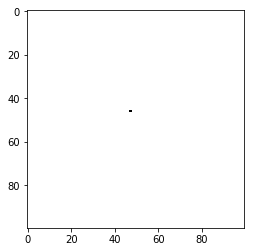

In [113]:
from PIL import Image
from PIL import ImageDraw
img = Image.open("/Users/piperfrances/BSRC/code/simple-shapes/smaller-shapes-set/shape1.png").convert('LA').convert('RGB')
arr = np.array(Image.fromarray(np.asarray(img)).resize((100,100)))
new_size = (100, 100)
new = Image.fromarray(arr)
new.save("/Users/piperfrances/Downloads/test.png")
plt.imshow(new)

In [83]:
from PIL import Image
from PIL import ImageDraw
img = Image.open("/Users/piperfrances/BSRC/code/simple-shapes/simple-shapes-set/shape1.png").convert('LA').convert('RGB')
arr = np.array(Image.fromarray(np.asarray(img)).resize((100,100)))
arr.shape

(100, 100, 3)